# Mesure de la constante de temps d'un circuit $RC$ série

## 1. Lecture des mesures

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pyduino import lit_fichier

# Lit le fichier de mesures et le stocke dans des tableaux
t, E, u = lit_fichier('charge.csv')
print(u[:5])

[0.0, 0.635386119257087, 1.1730205278592376, 1.6520039100684263, 2.067448680351906]


In [6]:
# calcul de ur (on pourrait aussi utiliser numpy)
ur = [e-u for e, u in zip(E, u)]

## 2. Représentation graphique des données

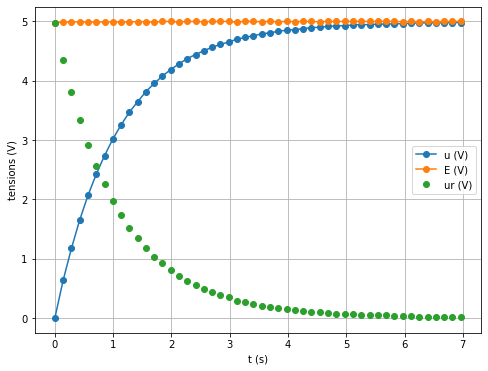

In [7]:
fig_c = plt.figure("Charge d'un condensateur", figsize=(8,6))
plt.plot(t, u, marker = 'o', label = 'u (V)')
plt.plot(t, E, marker = 'o', label = 'E (V)')
plt.plot(t, ur, marker = 'o', linestyle='', label = 'ur (V)')
plt.grid()
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.show()

## 3. Mesure de $\tau$

###  $1^{ère}$ méthode : à $t = \tau \; , 63 \%$ du saut de tension a eu lieu

In [8]:
# on recherche l'index de l'élément du tableau uc
# tq uc[k] = np.max(uc)*0.63
i = 0
while u[i] <= 4.99*0.63:
    i = i + 1
# print(i)
print(f"La constante de temps est tau =  {t[i]-t[0]:.3f} s" )

La constante de temps est tau =  1.136 s


### $2^{ème}$ méthode: ajustement à une exponentielle

In [9]:
def fonct_ajust(t, d):
    return 5*(1 - np.exp(-t/d))

popt, pcov = curve_fit(fonct_ajust, t, u)
# popt
print(f'La valeur de tau est {popt[0]:.3f} s' )

La valeur de tau est 1.087 s


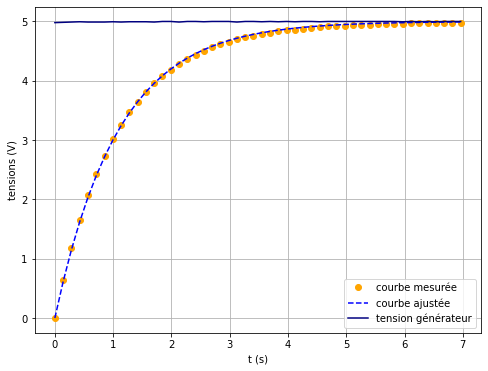

In [10]:
#  Graphe et modélisation
fig3 = plt.figure(figsize=(8,6))
plt.plot(t, u, linestyle='', marker ='o', color ='orange', label = 'courbe mesurée')
plt.plot(t, fonct_ajust(np.array(t), *popt), 'b--', label = 'courbe ajustée')
plt.plot(t, E, color='navy', label = 'tension générateur')
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.grid()
plt.show()

## Tracé des graphes $u_C = f(t)$ et $u_R = f(t)$ avec les tangentes 

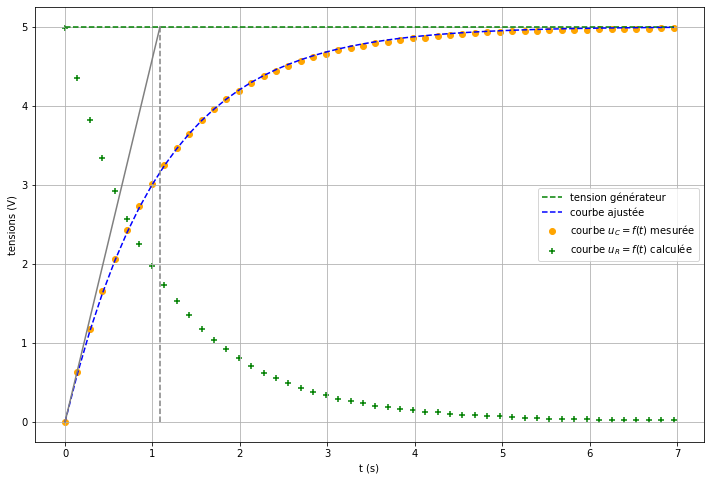

In [13]:
# Avec tracé de la tangente
tau = popt[0]
fig4 = plt.figure(figsize=(12,8))
plt.plot(t, [5.0 for e in t], color='green', linestyle='--', label = 'tension générateur')
plt.plot(t, fonct_ajust(np.array(t), *popt), 'b--', label = 'courbe ajustée')
plt.scatter(t, u, marker='o', color = 'orange', label = 'courbe $u_C=f(t)$ mesurée')
plt.scatter(t, ur, marker='+', color = 'green', label = 'courbe $u_R=f(t)$ calculée')
plt.plot([0, tau], [0, 5], '-', color='grey')
plt.plot([tau, tau], [0, 5], '--', color='grey')
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.grid()
plt.show()